In [28]:
filename = '/tmp/detectron-output/test/voc_2012_val/generalized_rcnn/comp4_8ffdcf6b-6996-4bed-ba66-8571b7405b74_det_val_'
FILENAME_DICT = '/home/elnazavr/Detectron/lib/datasets/data/VOC2012/VOCdevkit/VOC2012/JPEGImages/'
obj = 'aeroplane'
val = filename+obj+".txt"

In [29]:
with open(val, "r") as f:
    txt = f.read()
lines = txt.split("\n")[:-1]
dictionary= {}
confidence = {}
for line in lines:
    [fname, conf, x,y,w,h] = line.split(" ")
    dictionary[fname] = [float(x), float(y), float(w), float(h)]
    confidence[fname] = conf

In [30]:
from matplotlib.pyplot import imshow
from matplotlib.pyplot import figure, axis
from PIL import Image
from PIL import ImageFont, ImageDraw
from matplotlib._pylab_helpers import Gcf

def html_imshow(data, page_text=None, zoom=1.0):
    """
    Return html code containing the given pixmap image.
    """

    # http://stackoverflow.com/questions/28877752/ipython-notebook-how-to-combine-html-output-and-matplotlib-figures
    imshow(data)
    axis('off')

    # Get a handle for the plot that was just generated
    fig = Gcf.get_all_fig_managers()[-1].canvas.figure

    bbox = fig.gca().get_window_extent().transformed(fig.dpi_scale_trans.inverted())

    img_width, img_height = fig.get_size_inches() * fig.dpi

    # Generate a data URL for the image
    # Matplotlib's display() would output the plot, so I do this manually.
    # There might be a wrapper for this somewhere in IPython, if you're
    # unhappy with this line..
    image_data = "data:image/png;base64,%s" % b64encode(print_figure(fig, figsize=fig.get_size_inches(),
                                                                     dpi=fig.dpi, pad=0,
                                                                     bbox_inches=bbox,
                                                                     pad_inches=0)).decode("utf-8")

    # Remove the plot from the list of plots for the current cell
    Gcf.destroy_fig(fig)

    # ===========================================================
    # Alternative debugging code for the if statement below which
    # uses DIV elements corresponding to field label boxes placed
    # relatively using HTML positioning over the image.
    # DIV is used because it has border attribute contrary to
    # MAP's AREA element.
    # -----------------------------------------------------------
    # if page_text is not None:
    #     mapfields = ""
    #     for line in page_text:
    #         mapfields += html_mouseover_div(line, zoom)
    #     return ("<div style='position:relative;'><img style='min-width:%dpx;min-height:%dpx;' src='%s' />%s</div> "
    #             % (img_width, img_height, image_data, mapfields))
    # ===========================================================
    if page_text is not None:
        rand = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(5))
        mapfields = "<map name = 'textblips%s'>" % rand
        for line in page_text:
            mapfields += html_mouseover_field(line, zoom)
        mapfields += "</map>"
        return ("%s<img style='min-width:%dpx;min-height:%dpx;' src='%s' usemap='#textblips%s' />"
                % (mapfields, img_width, img_height, image_data, rand))
    else:
        # Now you can use the data URL in your HTML output
        return ("<img src = '%s'> " % image_data)


([8.5, 29.9, 422.8, 238.6], '0.999')


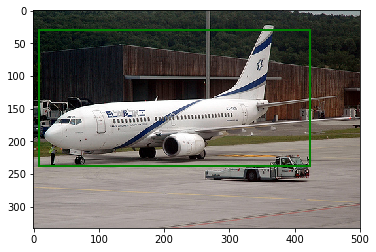

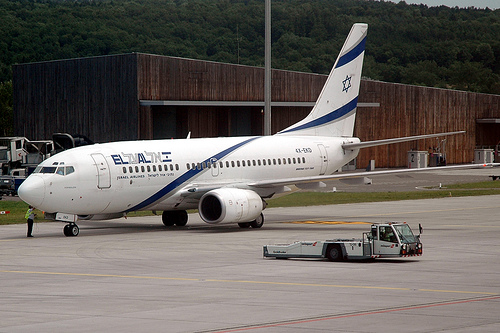

In [88]:
import PIL.Image as Image
import matplotlib.pyplot as plt
from base64 import b64encode
from IPython.core.pylabtools import print_figure
from IPython.display import display, HTML
import matplotlib.image as mpimg
fname = dictionary.keys()[39]
box = dictionary[fname]
#box = [0,0, 100,100] 
# top left width height
#plt.figure()
print(box, confidence[fname])
# bottom left width height
plt.figure()
plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0],
                            box[3]-box[1], fill=False, edgecolor='green', linewidth=2))
#plt.gca().add_patch(plt.Rectangle((box[0],box[1]),box[2], box[3] , fill=False, edgecolor='red', linewidth=2))
img = Image.open(FILENAME_DICT+fname+".jpg")
#img = mpimg.imread(FILENAME_DICT+fname+".jpg")
plt.imshow(img)
plt.show()
#cl_image= html_imshow(img)
#display(HTML('<h3>%s</h3><table><tr><td>%s<td></table>' % (filename, cl_image)))
Image.open(FILENAME_DICT+fname+".jpg")